# Import & Explore****

Disneyland Park is most certainly a land of enchantment where children and the young at heart find that dreams really do come true. Disneyland Park is a seamless blend of yesterday, today and tomorrow. Smiling train conductors, marching bands and the clip-clop of horse drawn carriages bring you back to carefree days. You can also rocket through the galaxy, board a runaway train or trek through the jungle. Laughter is always in the air, with friendly smiles all around. The secret to Disneyland is its ability to change yet, remain the same. As Walt Disney said "Disneyland will never be completed. It will continue to grow as long as there is imagination left in the world."

In [3]:
import numpy as np
import pandas as pd
import os
url='/kaggle/input/data-disneland/DisneylandReviews.csv'
df=pd.read_csv(url,encoding="cp1252")
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df=df.loc[df['Year_Month']=='missing']
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
269,647038712,4,missing,Philippines,The first thing on our agenda when we finished...,Disneyland_HongKong
282,646466731,3,missing,Singapore,Brought mum for the first time to Disneyland w...,Disneyland_HongKong
622,620580249,3,missing,Canada,I have been to Tokyo and LA Disneyland!I also ...,Disneyland_HongKong
5347,318799221,4,missing,Australia,We pre bought tickets at the hotel (same price...,Disneyland_HongKong
5799,284745152,5,missing,Philippines,Disneyland is indeed the most magical place in...,Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


# Removing Nulls & Duplicates

In [6]:
url='/kaggle/input/data-disneland/DisneylandReviews.csv'
df=pd.read_csv(url,encoding="cp1252",na_values=['missing'])
#==
df=df.dropna().reset_index()
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [7]:

df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

# Data Summary**

In [8]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  40022
Columns  :  7

Features : 
 ['index', 'Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text', 'Branch']

Missing values :   0

Unique values :  
 index                40022
Review_ID            40014
Rating                   5
Year_Month             111
Reviewer_Location      162
Review_Text          40022
Branch                   3
dtype: int64


In [9]:
df['Branch'].value_counts()

Branch
Disneyland_California    18196
Disneyland_Paris         12691
Disneyland_HongKong       9135
Name: count, dtype: int64

There is some bias in the data to Branches feature value counts aren't fairly distributed

# #Feature Engineering


In [10]:
new = df["Year_Month"].str.split("-", n = 1, expand = True)
df["year"]= new[0]
df["mounth"]= new[1]
df.drop(columns =["Year_Month"], inplace = True)
df['mounth']=df['mounth'].astype('int64')
df['quarter']=df['mounth'].apply(lambda x:1 if x<=3 else (2 if 3<x<=6 else (3 if 6<x<=9 else (4 if 9<x<=12 else x))))

# Get Review Length Feature

In [11]:

df.head(5)

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,year,mounth,quarter
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,2
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,2
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,2
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,2
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,2


In [12]:
df['Review_Text'].values[2:3]

array(['Thanks God it wasn   t too hot or too humid when I was visiting the park   otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn   t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn   t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand   even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.'],
      dtype=object)

In [13]:
df['review length']=df['Review_Text'].apply(lambda x:len(x))

# Sentiment Analysis Feature

In [14]:
import re

features = df['Review_Text'].values
#===
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
#===
df3=pd.DataFrame()
df3['reviews']=processed_features
df3.head(5)

,reviews
0,if you ve ever been to disneyland anywhere you...
1,its been while since last time we visit hk dis...
2,thanks god it wasn too hot or too humid when w...
3,hk disneyland is great compact park unfortunat...
4,the location is not in the city took around 1 ...


This part uses the TextBlob library to perform sentiment analysis. It defines two functions: getSubjectivity to calculate the subjectivity of the text, and getPolarity to calculate the polarity. Subjectivity is a measure of how subjective or opinionated the text is (ranging from 0 to 1), and polarity measures the positivity or negativity of the text (ranging from -1 to 1).

In [15]:
#=======
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)
df3.head(3)

,reviews,Subjectivity,Polarity
0,if you ve ever been to disneyland anywhere you...,0.561481,0.239352
1,its been while since last time we visit hk dis...,0.459783,0.205797
2,thanks god it wasn too hot or too humid when w...,0.434857,0.119238


In [16]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3

,reviews,Subjectivity,Polarity,Analysis
0,if you ve ever been to disneyland anywhere you...,0.561481,0.239352,Positive
1,its been while since last time we visit hk dis...,0.459783,0.205797,Positive
2,thanks god it wasn too hot or too humid when w...,0.434857,0.119238,Positive
3,hk disneyland is great compact park unfortunat...,0.512143,0.189286,Positive
4,the location is not in the city took around 1 ...,0.437500,0.266667,Positive
...,...,...,...,...
40017,although our pick up was prompt the taxi drive...,0.470556,0.034402,Positive
40018,just returned from 4 days family trip to disne...,0.437991,0.202937,Positive
40019,we spent the 20 dec 2010 in the disney park an...,0.493521,0.020628,Positive
40020,well was really looking forward to this trip o...,0.497893,0.125890,Positive


In [17]:
df['sentiment']=df3['Analysis']
df['Sentiment']=df['Rating'].apply(lambda x:'Negative' if x<3 else np.nan)
df['Sentiment']=df['Sentiment'].fillna(df['sentiment'])
df['Reviews_Text']=df3['reviews']
df=df.drop(['sentiment','Review_ID'],axis=1)


In [18]:
df_copy=df.copy()
df.head()

,index,Rating,Reviewer_Location,Review_Text,Branch,year,mounth,quarter,review length,Sentiment,Reviews_Text
0,0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,2,329,Positive,if you ve ever been to disneyland anywhere you...
1,1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,2,970,Positive,its been while since last time we visit hk dis...
2,2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,2,938,Positive,thanks god it wasn too hot or too humid when w...
3,3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,2,485,Positive,hk disneyland is great compact park unfortunat...
4,4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,2,163,Positive,the location is not in the city took around 1 ...


# Data Anlaysis & Visualizations

Reviews by years

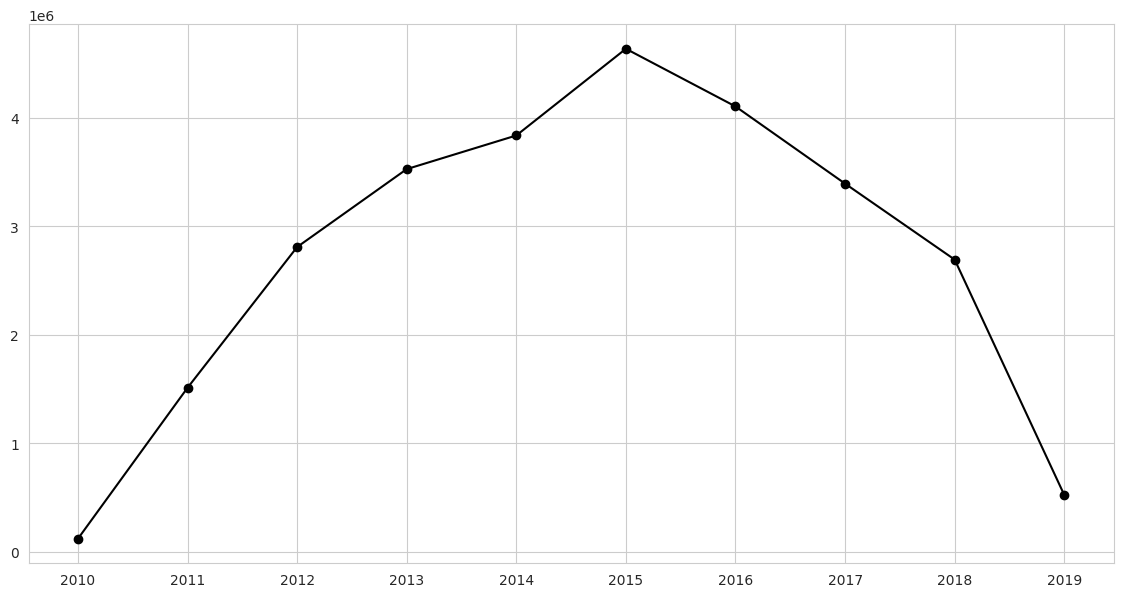

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
#==
df3=df.groupby('year',as_index=False).agg({'review length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df3['year'] ,df3['review length'],marker='o',label='review length by year',color='black');

There are many reviews in 2015

# Branches per year

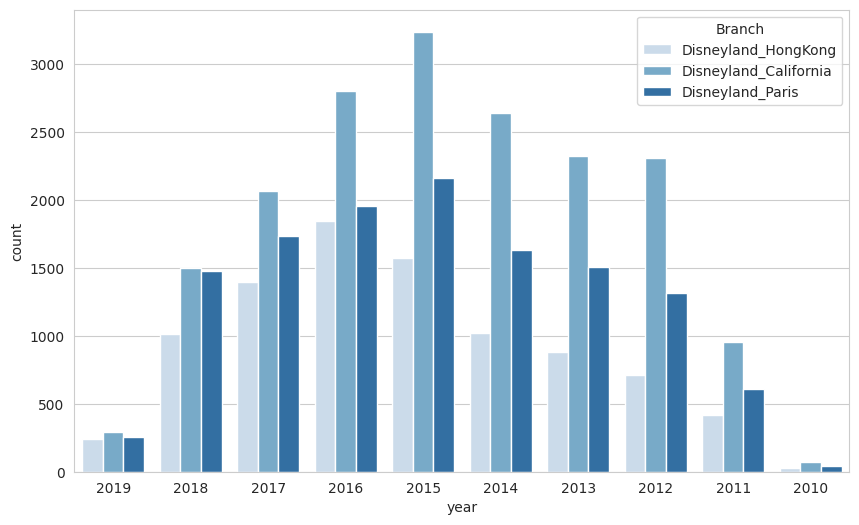

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='year',hue='Branch',palette='Blues');

# Review Length average

In [21]:
np.median(df['review length'].values)

427.0

<Figure size 1000x600 with 0 Axes>

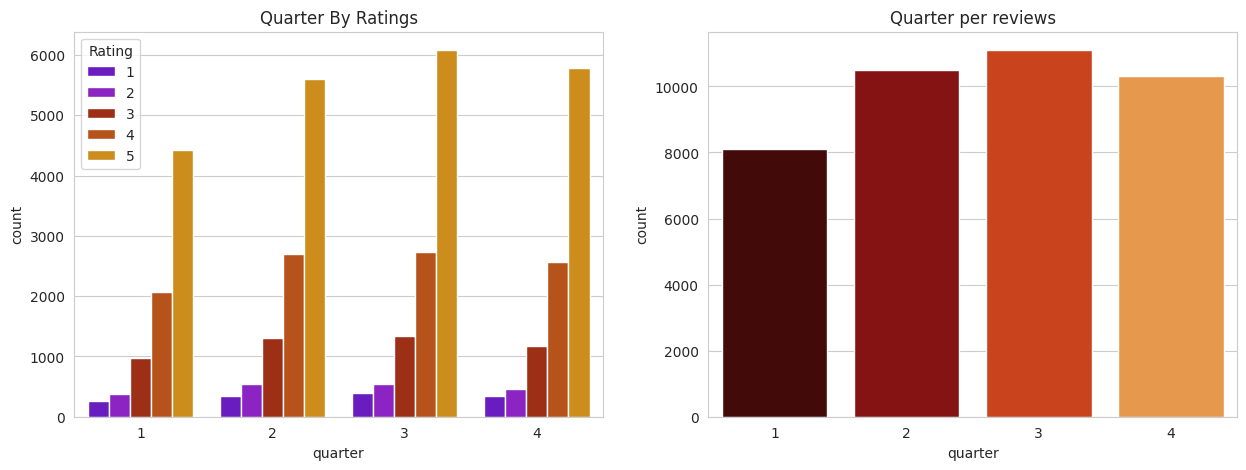

In [22]:
plt.figure(figsize=(10,6));
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False);
sns.countplot(ax=axes[0],data=df,x='quarter',hue='Rating',palette='gnuplot');
axes[0].set_title('Quarter By Ratings');
sns.countplot(ax=axes[1],data=df,x='quarter',palette='gist_heat');
axes[1].set_title('Quarter per reviews');
#==

# there are less reviews in the first quarter of the year

In [27]:


import plotly.express as px
fig_df=df.groupby('Reviewer_Location',as_index=False).agg({'Branch':'count'}).sort_values('Branch',ascending=False)
fig = px.choropleth(fig_df,
                    locations='Reviewer_Location', locationmode='country names',
                    color='Branch',
                    color_continuous_scale="portland", hover_data=['Branch'],
                    title='Country - Reviews')
fig.update(layout_coloraxis_showscale=False)
fig.show();

# Country - low rates

In [28]:
df4 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
df4.style.background_gradient(cmap="autumn", subset=['Rating'])

,Reviewer_Location,Rating
3,Andorra,2.000000
147,Turks and Caicos Islands,2.000000
132,South Sudan,2.000000
136,Suriname,2.000000
39,Ecuador,2.333333
58,Haiti,3.000000
129,Solomon Islands,3.000000
107,Northern Mariana Islands,3.000000
36,Democratic Republic of the Congo,3.000000
128,Slovenia,3.000000


# Rates-Year

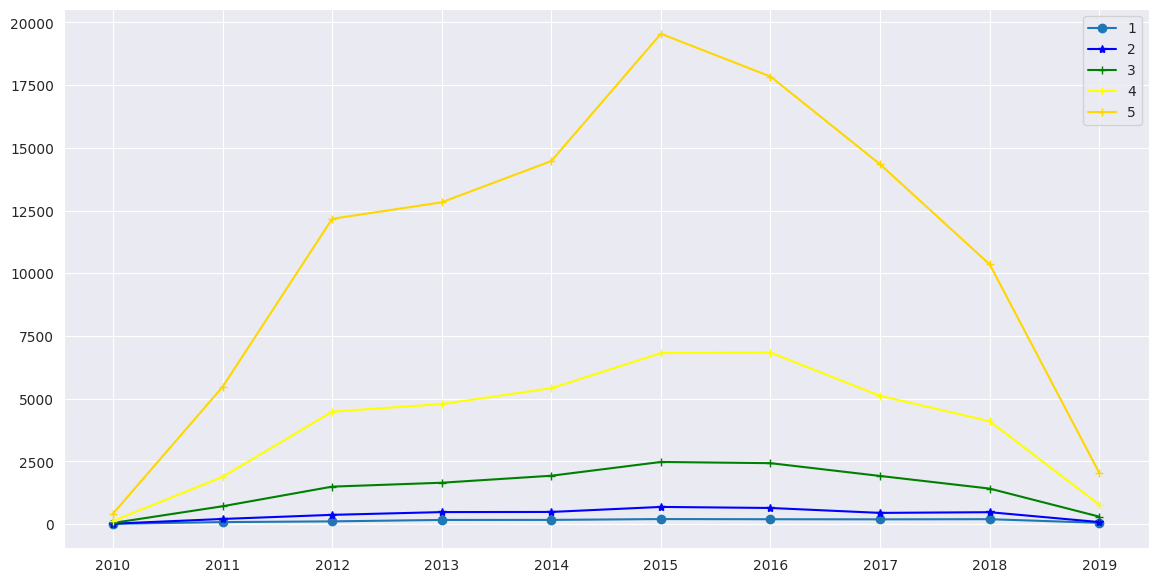

In [29]:
one = df.loc[df['Rating']==1]
one=one.groupby('year',as_index=False).agg({'Rating':'sum'})
#==
two = df.loc[df['Rating']==2]
two=two.groupby('year',as_index=False).agg({'Rating':'sum'})

#==
three = df.loc[df['Rating']==3]
three=three.groupby('year',as_index=False).agg({'Rating':'sum'})
#===
four = df.loc[df['Rating']==4]
four=four.groupby('year',as_index=False).agg({'Rating':'sum'})
#===
fifth = df.loc[df['Rating']==5]
fifth=fifth.groupby('year',as_index=False).agg({'Rating':'sum'})
#==============
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.plot(one['year'] ,one['Rating'],marker='o',label='1')
plt.plot(two['year'] , two['Rating'],color='blue',marker='*',label='2')
plt.plot(three['year'] ,three['Rating'],color='green',marker='+',label='3')
plt.plot(four['year'] ,four['Rating'],color='yellow',marker='+',label='4')
plt.plot(fifth['year'] ,fifth['Rating'],color='gold',marker='+',label='5')
plt.legend();

# Rates-Branch

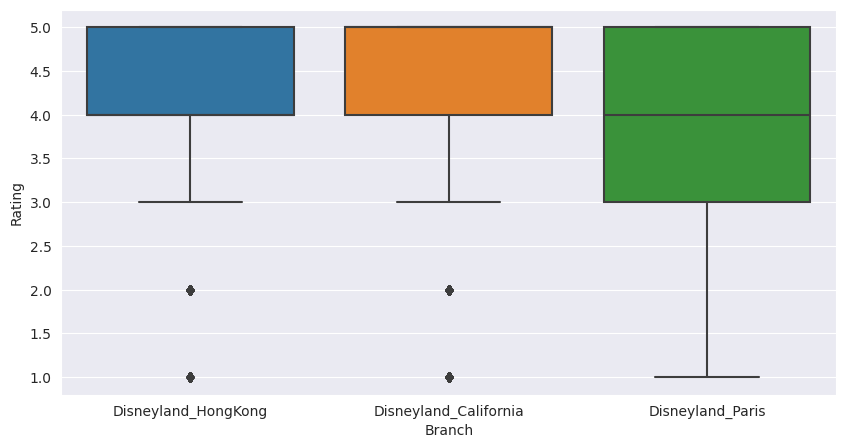

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Branch", y="Rating", data=df);

# Sentiments-Branches

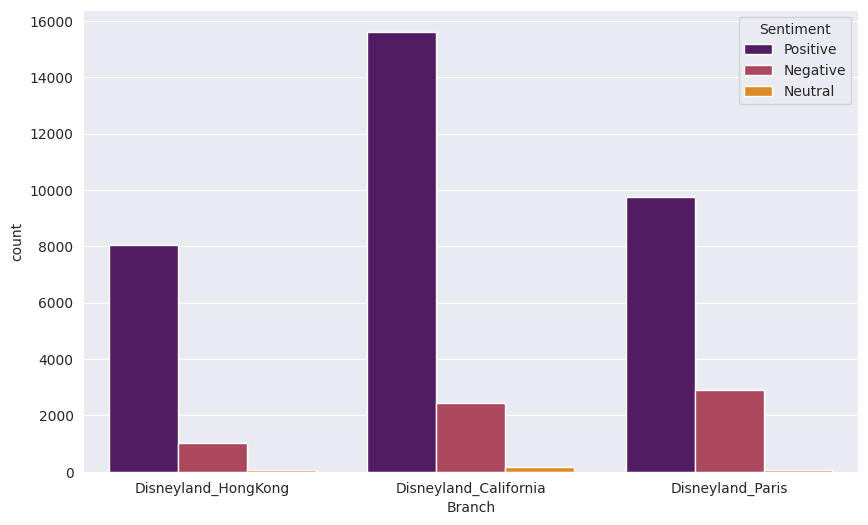

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='Sentiment',palette='inferno');

# Sentiment percentage-Branch

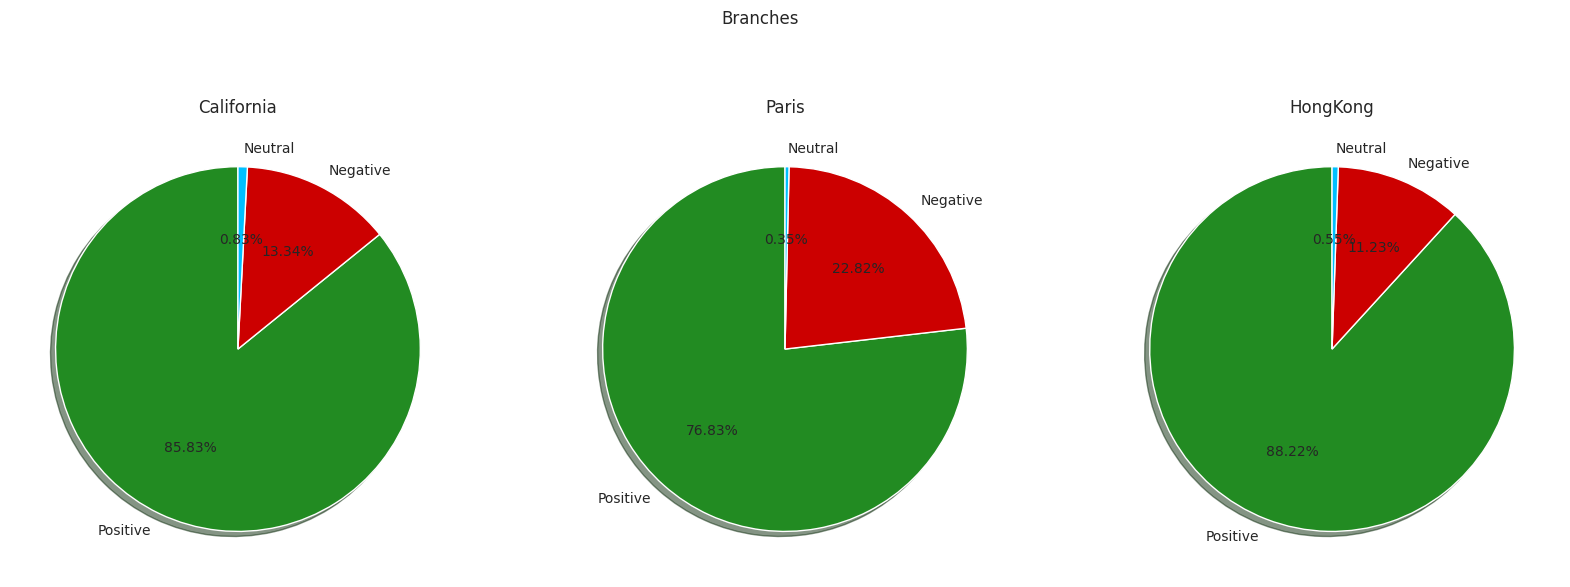

In [32]:

df_cal=df.loc[df['Branch']=='Disneyland_California']
df_par=df.loc[df['Branch']=='Disneyland_Paris']
df_hon=df.loc[df['Branch']=='Disneyland_HongKong']

#=====
label_cal =df_cal['Sentiment'].value_counts(sort = True).index
size_cal= df_cal['Sentiment'].value_counts(sort = True)
#=====
label_par =df_par['Sentiment'].value_counts(sort = True).index
size_par= df_par['Sentiment'].value_counts(sort = True)
#====
label_hon =df_hon['Sentiment'].value_counts(sort = True).index
size_hon= df_hon['Sentiment'].value_counts(sort = True)
#===




fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
fig.suptitle('Branches')
axes[0].pie(size_cal,labels=label_cal,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[0].set_title('California')
axes[1].pie(size_par,labels=label_par,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[1].set_title('Paris');
axes[2].pie(size_hon,labels=label_hon,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#228B22','#CC0000','#00BFFF']);
axes[2].set_title('HongKong');

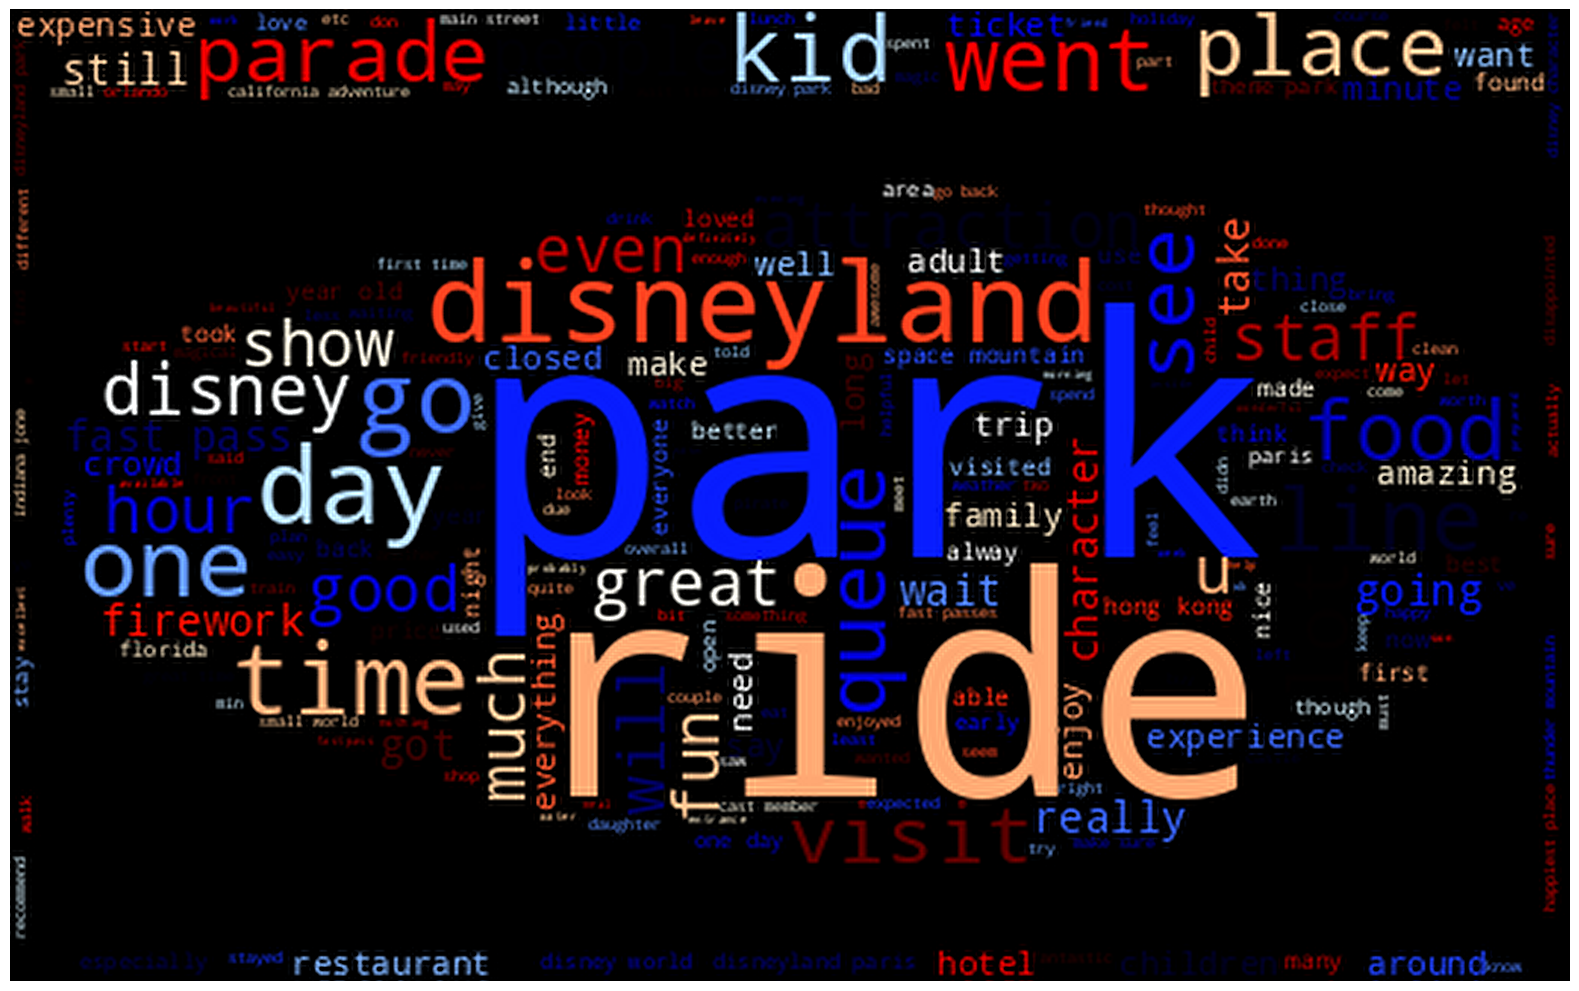

In [33]:
import json
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
df['Reviews_Text']=df['Reviews_Text'].astype('str')
Reviews_Text = " ".join(txt for txt in df.Reviews_Text)
c_mask = np.array(Image.open("/kaggle/input/data-disneland/download (2).png"))
inverse_mask = np.ones_like(c_mask) * 255
inverse_mask[c_mask > 0] = 0

# Create WordCloud with the inverted polygon mask
wc = WordCloud(background_color='black', mask=inverse_mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='black', colormap='flag')
wc.generate(Reviews_Text)

# Display the Word Cloud inside the inverted polygon
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='sinc')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

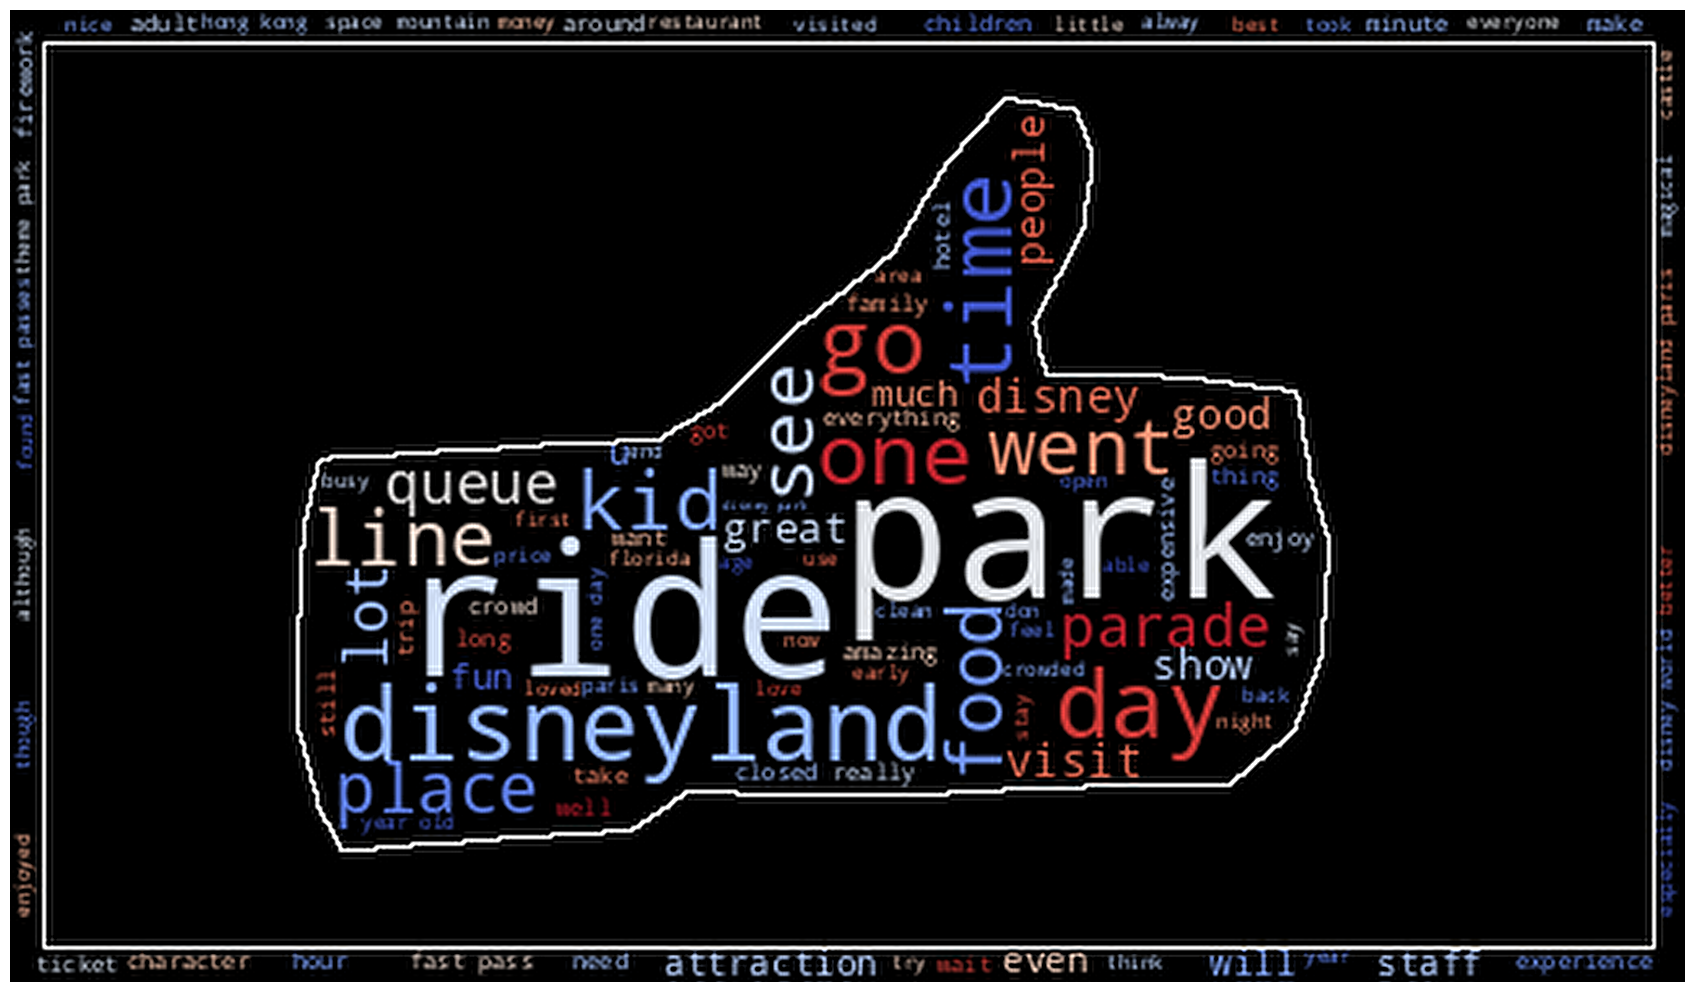

In [34]:
df_like=df.loc[df['Sentiment']=='Positive']
Reviews_Text = " ".join(insul for insul in df_like.Reviews_Text)
c_mask = np.array(Image.open("/kaggle/input/data-disneland/download.png"))
inverse_mask = np.ones_like(c_mask) * 255
inverse_mask[c_mask > 0] = 0

# Create WordCloud with the inverted polygon mask
wc = WordCloud(background_color='black', mask=inverse_mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='white', colormap='coolwarm')
wc.generate(Reviews_Text)

# Display the Word Cloud inside the inverted polygon
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='sinc')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

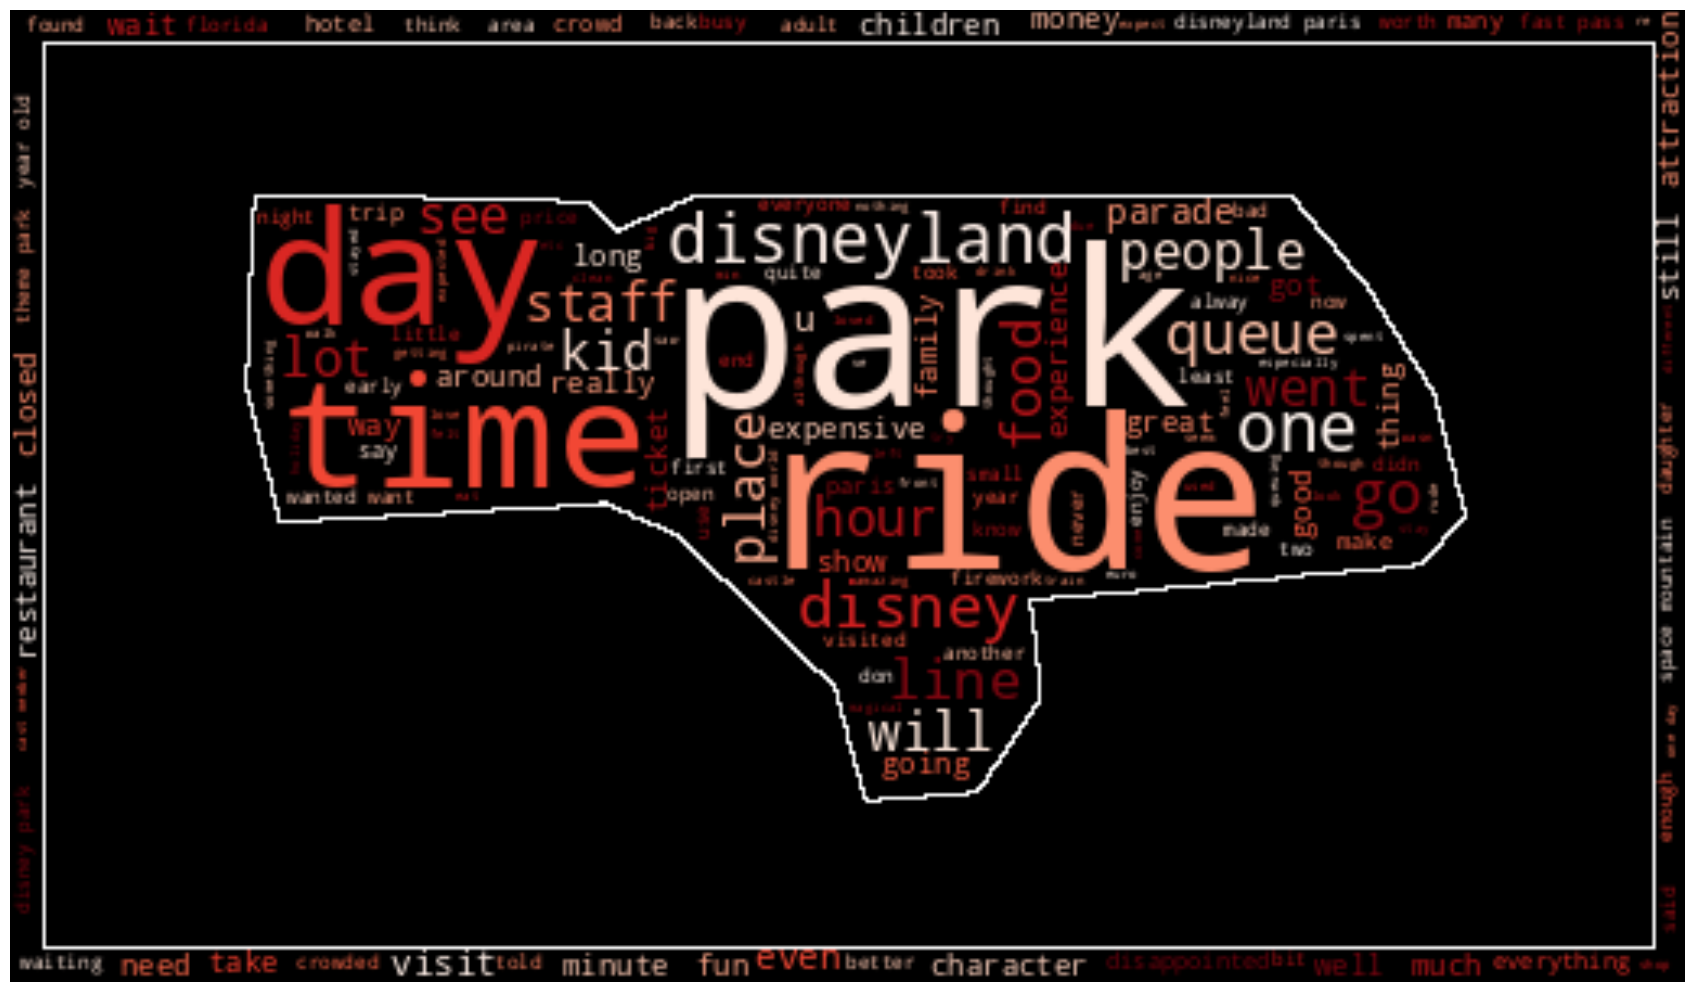

In [35]:
df_dislike=df.loc[df['Sentiment']=='Negative']
#===
Reviews_Text = " ".join(insul for insul in df_dislike.Reviews_Text)

l_mask = np.array(Image.open("/kaggle/input/data-disneland/download (1).png"))
inverse_mask1 = np.ones_like(l_mask) * 255
inverse_mask1[l_mask > 0] = 0
#== 
wc = WordCloud(background_color='black', mask=inverse_mask1, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='white',colormap='Reds')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [36]:
df_dislike
review = df_dislike['Reviews_Text'].drop_duplicates()
all_sentences = []

for word in review:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_sm')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2)
df = df[0].value_counts()
#== 
df = df[:20,]
#== 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

In [37]:
df6

,Word,Entity
0,tokyo,GPE
1,hong kong,GPE
2,only 2,CARDINAL
3,2 days,DATE
4,1,CARDINAL
...,...,...
32443,paris,GPE
32444,doesn,GPE
32445,1st,ORDINAL
32446,at least an hour,TIME


In [39]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

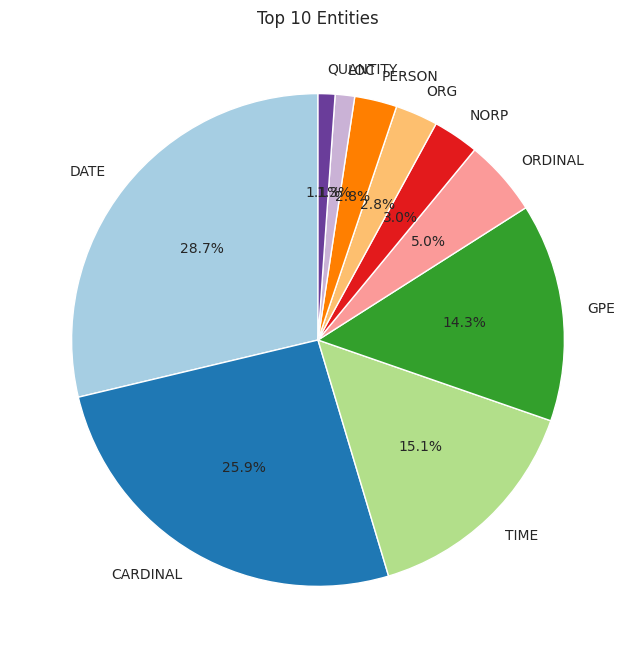

In [40]:
import matplotlib.pyplot as plt

# Assuming df6 is your DataFrame
entity_counts = df6['Entity'].value_counts()
top_entities = entity_counts.head(10)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Entities')
plt.show()


Time and Dates words constitute 40 % of words in negative reviews texts

# Time Words ⏱️

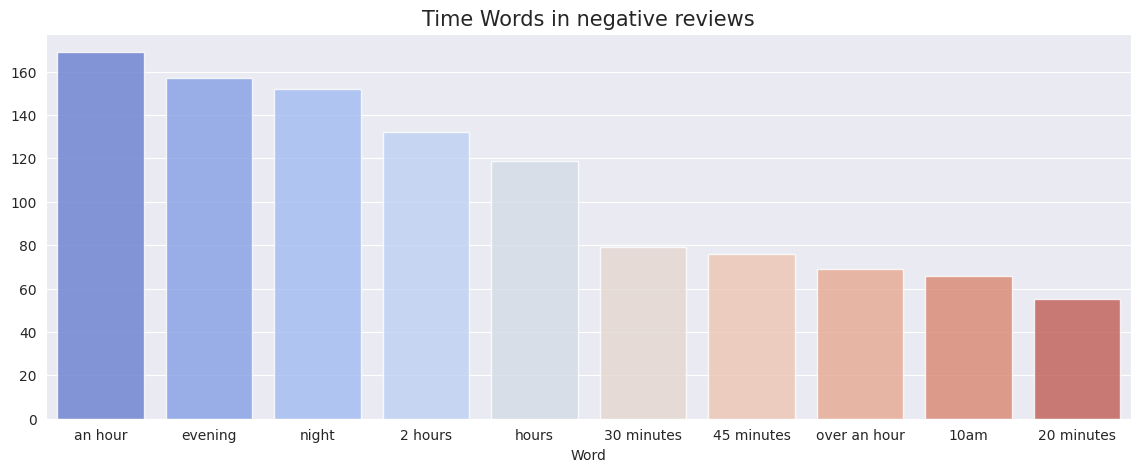

In [41]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

Making visitors waits about one hour or more drives them to write negative reviews

# Name Words 🧝

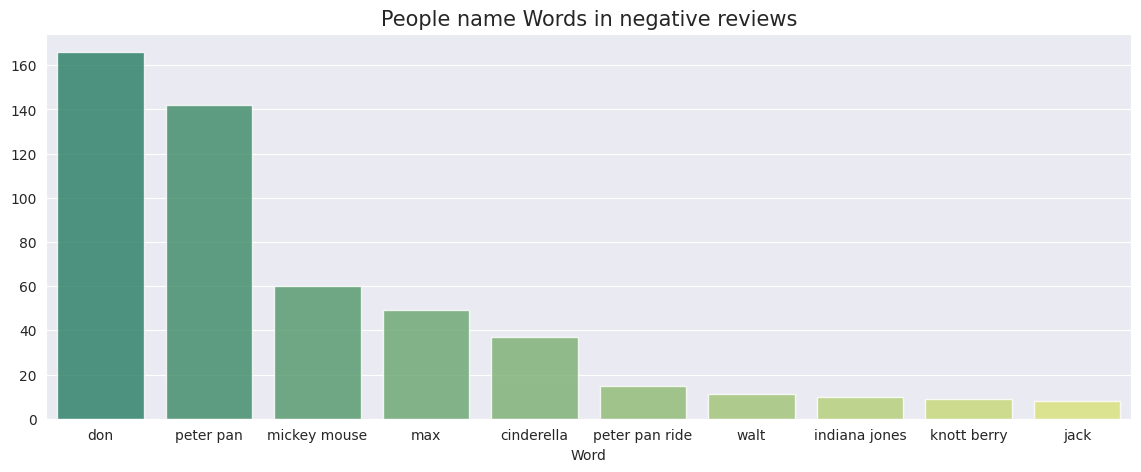

In [42]:
PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="summer");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

Cehck peter pan negative reviews

In [43]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('peter pan'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['Always a fun experience. Always amazed at how busy peter pan is?!?!?!? I am not sure what I missed riding it. I mean the ride is fun but 2 hours in line is a lot.']


['Let me start off by saying I was in Cali with my family visiting so disney was not the destination but we decided to take the kids. We went on Monday 3 7 during the afternoon. It was not crowded we actually got to go on every ride that was...open!There are alot of rides closed that they do not tell you about on the website and dont bother calling either because you wont find out that way. We did however enjoy the rides we got to go on. The peter pan ride was the highlight of my visit its worth the line wait. The food and drink price are what you expect of an amusement park so it didnt seem over the top expensive to me just what I would expect being at an amusement park. The workers seemed nice I really didnt interact with them that much except to ask where certain rides were and they were helpful. It did start to get 

# Ordinal Words 🔢

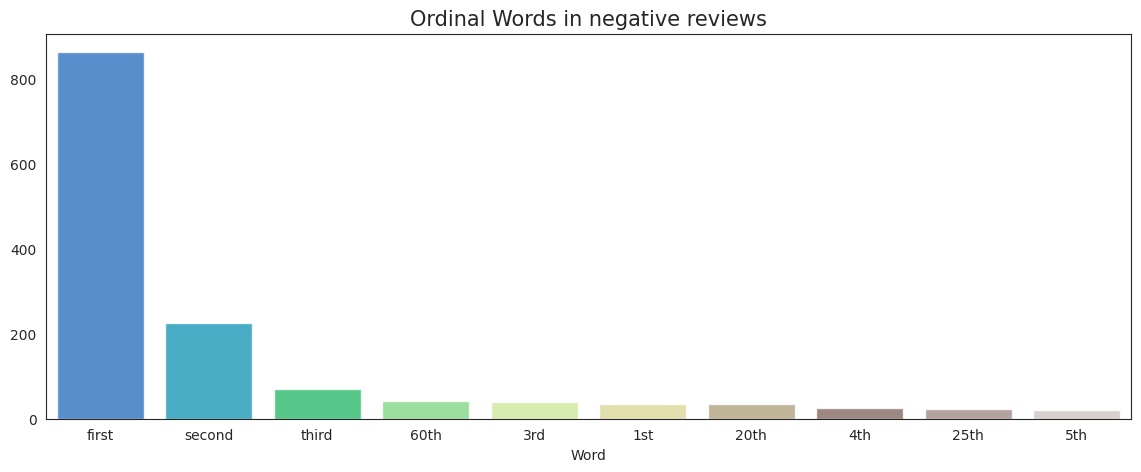

In [44]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("white")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

# Organizations Words 🏫

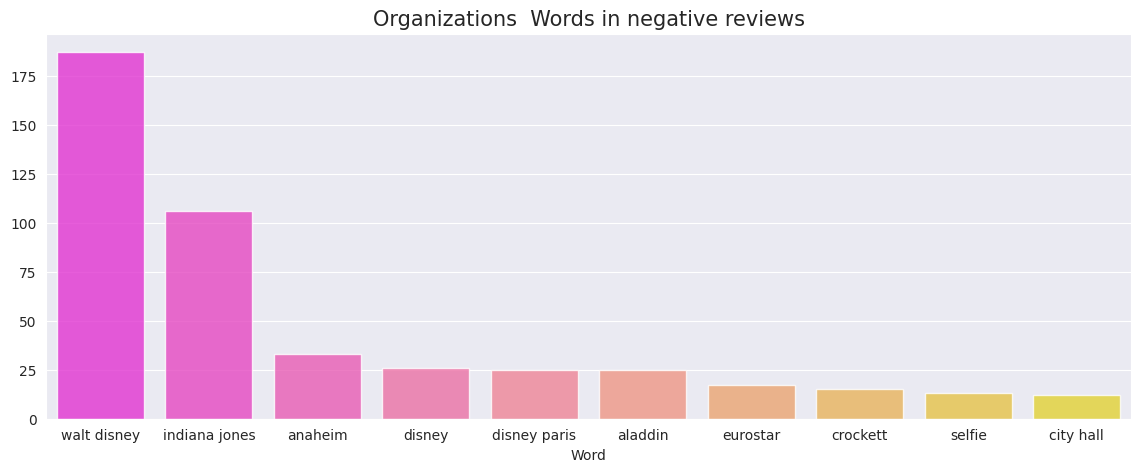

In [45]:
ORG = df6.query("Entity == 'ORG'")        
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="spring");
plt.title('Organizations  Words in negative reviews',fontsize=15);
plt.show();

Cehck Indiana Jones negative reviews

In [46]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('indiana jones'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['Review_Text'].values[31:32])
print('\n')
print(df_don['Review_Text'].values[7:8])
print('\n')
print(df_don['Review_Text'].values[20:21])

['No where near the Orlando disney park, but if you have kids and don   t know what to do they might enjoy it!Few tips to maximize the outcome of your visit:1. Stick to disneyland park. The Universal studios is a no no. Not worth the ticket and nothing much to do. Few rides and I think it only has the Aero Smith ride. Others are complete waste of time.2. Try to go in weekdays and low season. The prices of tickets can be 50% cheaper.3. Don   t be fouled with the Super Magic plus. It absolutely means nothing and no privileges except you paid more for your tickets.4. Maximize the use of the fast pass. You can register for a fast pass and wait go for other ride. That will save you time and make you avoid long ques.5. Expect long waiting times for major rides (80 100 minutes). You need to be smart in planning you fast pass.6. Highly recommend the star wars ride and indiana jones for adults.Wish you all a pleasant visit to Disneyland paris and I will be glad to answer questions if any.']


[

# Nation Words 🗺️

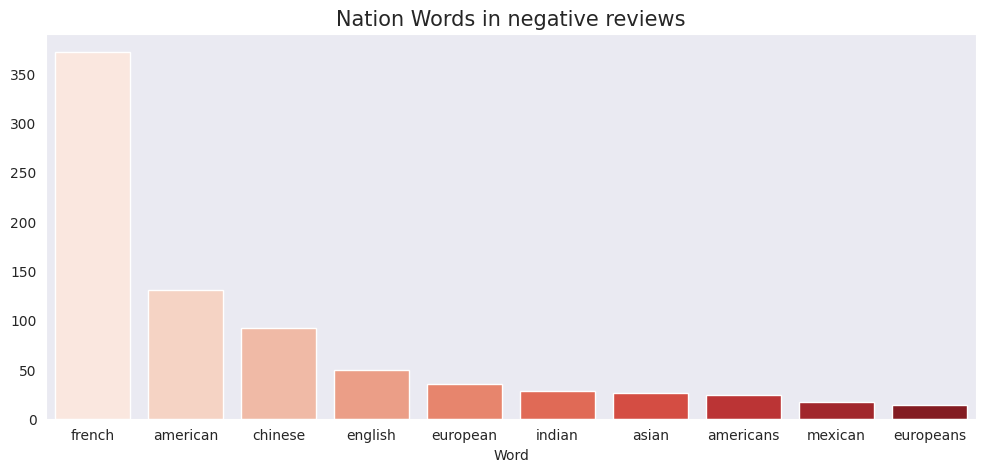

In [47]:
NORP = df6.query("Entity == 'NORP'")        
NORP =NORP['Word'].value_counts()
NORP = NORP[:10]
sns.set_style("dark")
plt.figure(figsize=(12,5));
NORP = sns.barplot(x=NORP.index,y= NORP.values, alpha=1,palette="Reds");
plt.title('Nation Words in negative reviews',fontsize=15);
plt.show();

Cehck french negative reviews¶


In [48]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[51:52])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[20:21])

["I was expecting for a theme park for children and adults, i found one toliet in each area, which is not great when you have kids wanting to go to the toliet. There were also hardly any shelter for push chairs and prams, when it was raining during rides etc.There was hardly any characters walking around the park, I know we may of gone out of season but this theme park is open all year round and there should not be a difference in staff rates depending on season.I found the disney village the worst place for kids, Each resturant would not accomadate for families with prams. out of 10 places to eat in the village,there was only two resturants that had a downstairs area. one resturant was a pre book only and the other, we were told we couldn't eat downstairs.I found the disney village staff very rude and not helpful at all.The parks had some good rides but be prepared to do a lot of reading from screens as most rides had french commentry and no english was repeated.Also read carefully al

# Location Words 📍

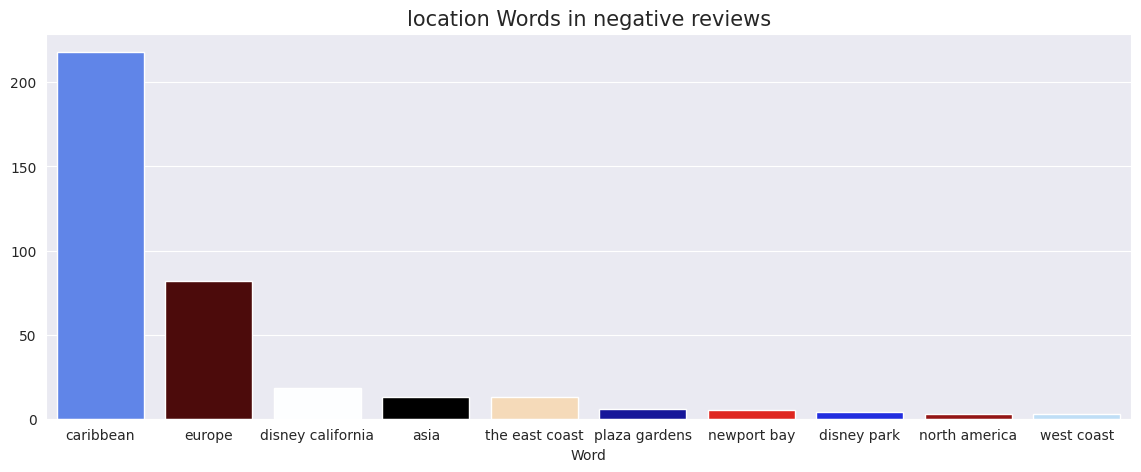

In [49]:
LOC = df6.query("Entity == 'LOC'")        
LOC =LOC['Word'].value_counts()
LOC = LOC[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
NORP = sns.barplot(x=LOC.index,y= LOC.values, alpha=1,palette="flag");
plt.title('location Words in negative reviews',fontsize=15);
plt.show();

# Cehck pirates of the caribbean negative reviews¶


In [50]:
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('caribbean'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])

["Too many favorites closed for renovations or had mechanical trouble when we were there: it's a small world, pirates of the caribbean, finding nemo, indiana jones among them. Space Mountain ride was a blast, Innoventions House of the Future was very nice to walk through. Glad my daughter got our tix at her employee discount, otherwise prices are really getting too pricey."]


['too many people on June 30 monday... restaurants all full, space mountain closed, pirates of the caribbean broked down, attractions all full.... dissapointing']


["Visited the park on 22nd and 23rd December 2013.Love the park and all the classic attractions: space mountain, star wars, pirates of the caribbean, it's a small world...A shame the park was so full. More than 1hr queue for most attractions. It seems the park do not apply a maximum number of visitors like they do at Universal Studios (when the max visitors is reached, they just close the ticket sales). Main street was packed. All restaurants and coff

# Money Words 💰

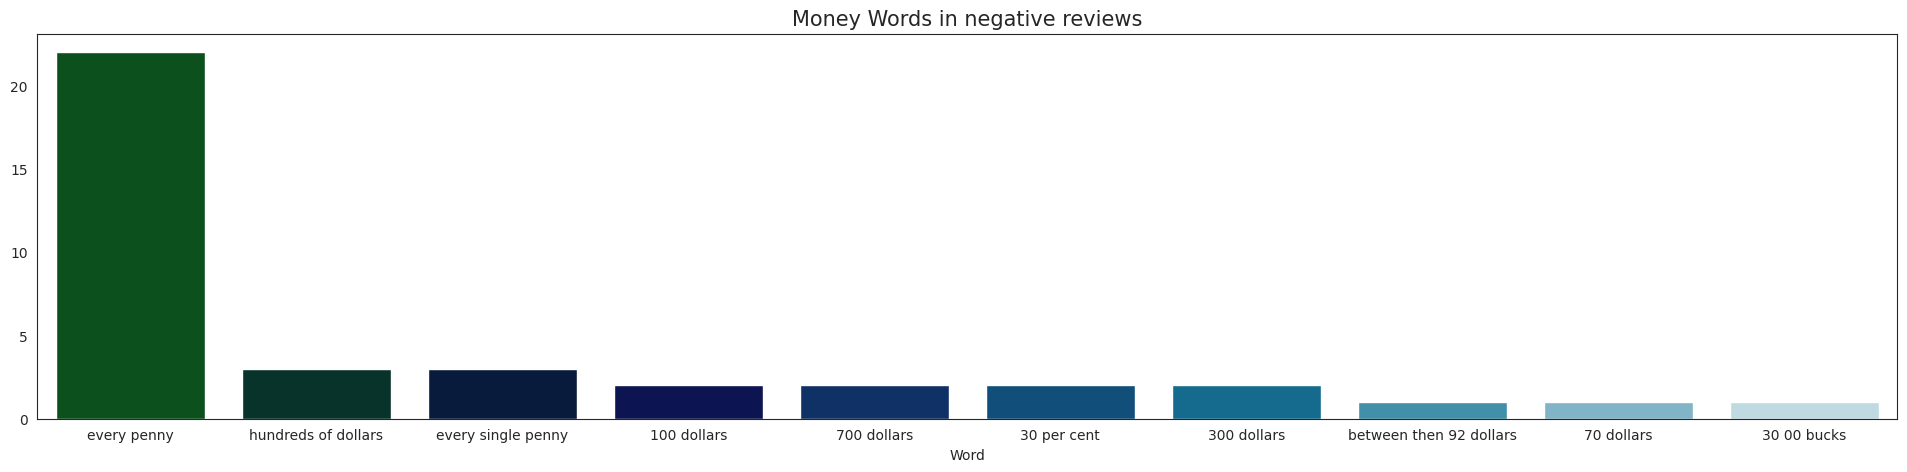

In [51]:
PRODUCT = df6.query("Entity == 'MONEY'")        
PRODUCT =PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]
sns.set_style("white")
plt.figure(figsize=(24,5));
NORP = sns.barplot(x=PRODUCT.index,y= PRODUCT.values, alpha=1,palette="ocean");
plt.title('Money Words in negative reviews',fontsize=15);
plt.show();